# Problem Statement
# We want to know how strongly the variables of movies dataset are correlated with each other by using visualization.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


## read data
df = pd.read_csv(r'C:\Users\hp\Desktop\portfolio project\movies.csv')




In [3]:
 df.head(5)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
## lets see if any data is missing

for col in df.columns:
    missing_value = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing_value))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
###missing data
missing_data = df.isnull()

In [6]:
# replace Nan with mean values
## first calculate the mean
average_budget = df['budget'].astype('float').mean(axis = 0)
print(average_budget)
average_gross  =  df['gross'].astype('float').mean(axis = 0)
print(average_gross)


35589876.192650534
78500541.01778312


In [7]:
## now replave th NAN with mean value
df['budget'].replace(np.nan,average_budget,inplace = True)
df['gross'].replace(np.nan,average_gross,inplace = True)


In [8]:
## changing the dATA TYPE
df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)


In [16]:
for col in df.columns:
    missing_value = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,missing_value))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [11]:
## it sorts the data according to gross in descending order

df = df.sort_values(by= ['gross'],inplace = False,ascending = False)

In [12]:
## if we have to remove the middle seperation line
pd.set_option('display.max_rows',None)

In [18]:
## drop any duplicates
df['name'].drop_duplicates().sort_values(ascending=False).head(10)



4722                      Æon Flux
4761       xXx: State of the Union
7112    xXx: Return of Xander Cage
4083                           xXx
3503                      eXistenZ
5642                        [Rec]²
166           Zorro: The Gay Blade
6863                      Zootopia
180                      Zoot Suit
4984                          Zoom
Name: name, dtype: object

In [14]:
## now we wll do correlation
# budget high correlation

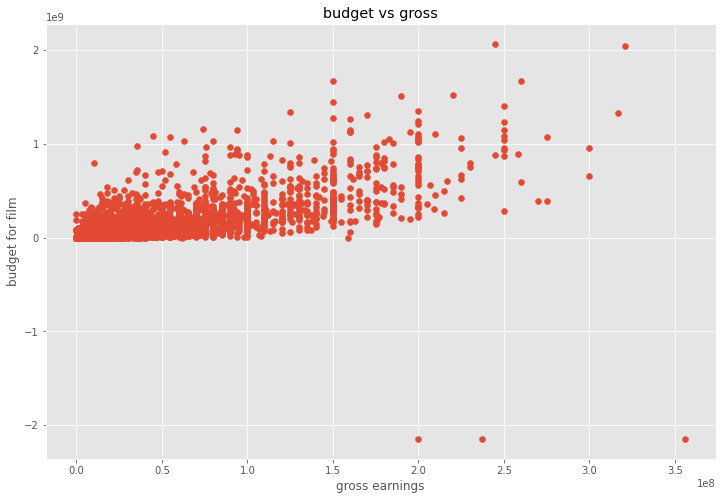

In [15]:
## scatter plot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('budget vs gross')
plt.xlabel('gross earnings')
plt.ylabel('budget for film')
plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

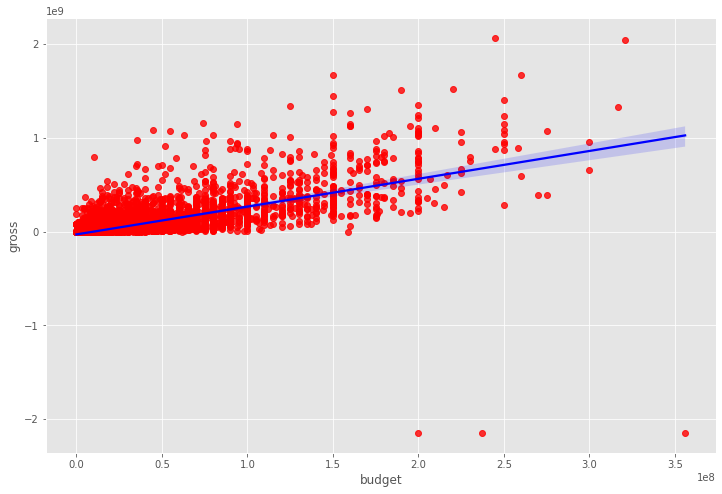

In [17]:
## plot the budget vs gross
sns.regplot(x='budget',y='gross',data =df,scatter_kws={'color':'red'},line_kws={'color':'blue'})
## this shows a positive correlation

In [18]:
## lets start looking at correlation
df.corr(method ='pearson')  # 3 types pearson correlaation ,kendall,spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.246315,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.165776,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.569499,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.643677,0.265305
gross,0.246315,0.165776,0.569499,0.643677,1.000000,0.200099
runtime,0.120811,0.399451,0.309212,0.265305,0.200099,1.000000


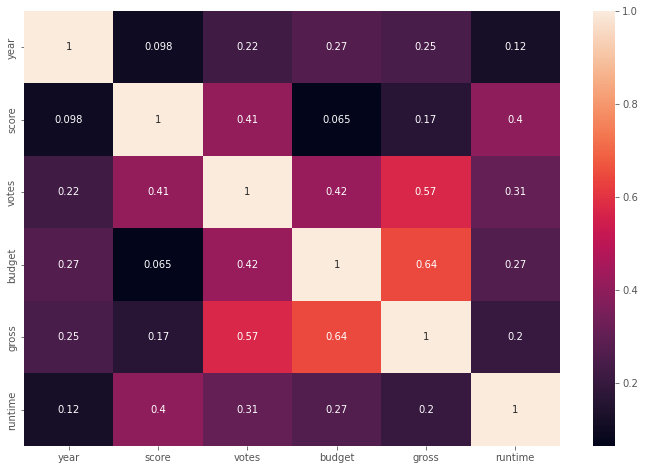

In [20]:
##now we will visualize the above coorelation matrix
correlation_matrix = df.corr(method ='pearson')
sns.heatmap(correlation_matrix,annot = True) ## annot labells the numbers
plt.show()

In [44]:
##now we will convert all the object type data into a numeric category
df_numeric = df
for col_name in df_numeric.columns:
    if (df_numeric[col_name].dtype == 'object'):
        df_numeric[col_name]=   df_numeric[col_name].astype('category')
        df_numeric[col_name]=   df_numeric[col_name].cat.codes 
                ##this cat codes is used to automatically fill uniqe numbers to the columns
df_numeric.head()
        
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0
7480,6194,4,2,2019,1488,6.9,222000.0,1455,1919,676,55,260000000,1670727580,2316,118.0
6653,2969,5,0,2015,1704,7.0,593000.0,517,3568,437,55,150000000,1670516444,2281,124.0
6043,5502,5,0,2012,2472,8.0,1300000.0,1517,2314,2241,55,220000000,1518815515,1606,143.0


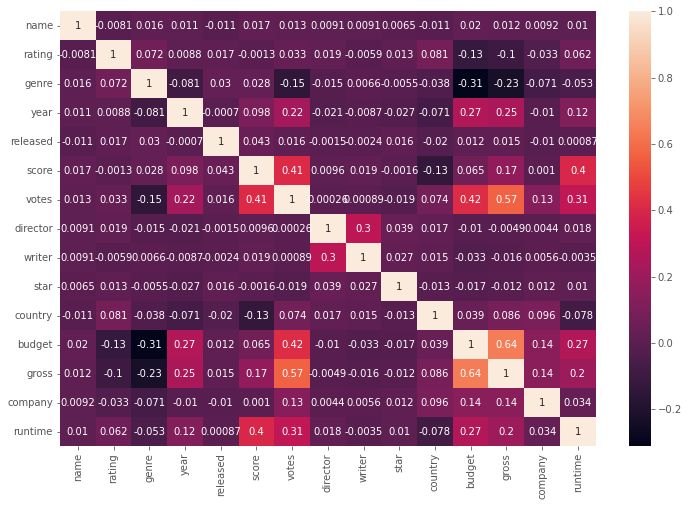

In [37]:
correlation_matrix = df_numeric.corr(method ='pearson')
sns.heatmap(correlation_matrix,annot = True) ## annot labells the numbers
plt.show()

In [39]:
correlation_mat = df_numeric.corr()
corr_pair = correlation_mat.unstack()
corr_pair

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020368
          gross       0.012372
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.126046
          gross      -0.102090
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [40]:
sorted_corr = corr_pair.sort_values()
sorted_corr

genre     budget     -0.310566
budget    genre      -0.310566
genre     gross      -0.225419
gross     genre      -0.225419
votes     genre      -0.145307
genre     votes      -0.145307
country   score      -0.133348
score     country    -0.133348
budget    rating     -0.126046
rating    budget     -0.126046
gross     rating     -0.102090
rating    gross      -0.102090
genre     year       -0.081261
year      genre      -0.081261
runtime   country    -0.078412
country   runtime    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
          country    -0.037615
country   genre      -0.037615
writer    budget     -0.033216
budget    writer     -0.033216
company   rating     -0.032943
rating    company    -0.032943
year      star       -0.027242
star      year       -0.027242
director  year       -0.020795
year      director   -0.020795
released

In [43]:
high_corr = sorted_corr[(sorted_corr)>0.5]
high_corr

votes     gross       0.569499
gross     votes       0.569499
          budget      0.643677
budget    gross       0.643677
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

# Insights

## The above scatterplot and the heatmap  shows a postive correlation between Budget and Gross income and an average correlation between votes and budget.
## There is a negative correlation between budget and score.
